# Oasis Infobyte(Data Science)

Batch - January Phase 1 AICTE OIB-SIP 2024.

Task 4 : EMAIL SPAM DETECTION WITH MACHINE LEARNING

Made By: Ronil Shah

# Problem Statement

We’ve all been the recipient of spam emails before. Spam mail, or junk mail, is a type of email
that is sent to a massive number of users at one time, frequently containing cryptic
messages, scams, or most dangerously, phishing content.

In this Project, use Python to build an email spam detector. Then, use machine learning to
train the spam detector to recognize and classify emails into spam and non-spam. Let’s get
started!

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
dataset=pd.read_csv('spam.csv',encoding='latin-1')

In [3]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
dataset.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
dataset.shape

(5572, 5)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [10]:
dataset.duplicated().sum()

403

In [11]:
dataset.drop_duplicates(inplace=True)

In [12]:
dataset.shape

(5169, 5)

In [13]:
dataset.isnull().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

In [14]:
dataset.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
dataset.shape

(5169, 2)

In [15]:
dataset.isnull().sum()

v1    0
v2    0
dtype: int64

In [16]:
dataset.rename(columns={'v1':'Spam','v2':'Text'},inplace=True)
dataset

,Spam,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [17]:
dataset['Spam'].value_counts()

ham     4516
spam     653
Name: Spam, dtype: int64

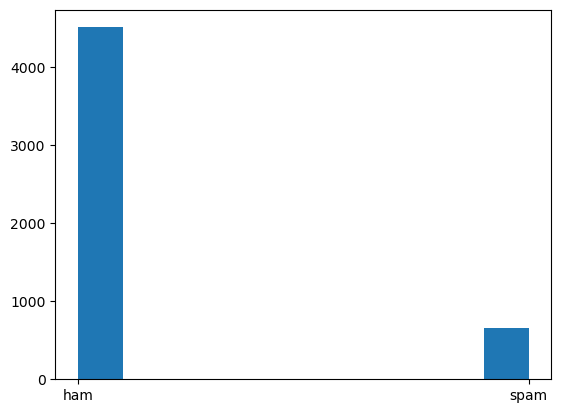

In [18]:
plt.hist(x=dataset['Spam'])
plt.show()

In [19]:
ham_texts = dataset[dataset.Spam=='ham']
spam_texts= dataset[dataset.Spam=='spam']
print(f"Ham shape:{ham_texts.shape}") 
print(f"Spam shape: {spam_texts.shape}")

Ham shape:(4516, 2)
Spam shape: (653, 2)


In [20]:
ham_sample = ham_texts.sample(n=653)

In [21]:
ham_sample.shape

(653, 2)

In [22]:
balanced_data = pd.concat([ham_sample,spam_texts],axis=0)
balanced_data.shape

(1306, 2)

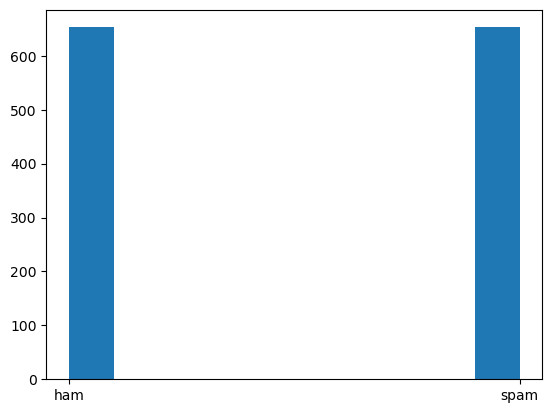

In [23]:
plt.hist(balanced_data['Spam'])
plt.show()

In [24]:
balanced_data['Spam'].replace({'ham':0,'spam':1},inplace=True)

In [25]:
balanced_data

,Spam,Text
2103,0,Its a site to simulate the test. It just gives...
4414,0,"Yeah I should be able to, I'll text you when I..."
2211,0,Just gettin a bit arty with my collages at the...
4804,0,Sorry for the delay. Yes masters
5096,0,But i'm really really broke oh. No amount is t...
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [26]:
balanced_data['Text'].nunique()

1306

Training dataset and Testing dataset

In [27]:
vectorizer = TfidfVectorizer()
X=vectorizer.fit_transform(balanced_data['Text'])
Y=balanced_data['Spam']

In [28]:
print(X)

  (0, 3246)	0.3095536894611548
  (0, 4386)	0.11063623786179265
  (0, 3211)	0.2641027513703398
  (0, 3982)	0.3095536894611548
  (0, 4133)	0.2354264022011103
  (0, 4384)	0.08984186547229034
  (0, 1979)	0.3095536894611548
  (0, 2321)	0.1441432216913754
  (0, 2274)	0.1441432216913754
  (0, 3864)	0.5282055027406796
  (0, 3885)	0.10676996561541649
  (0, 3543)	0.3095536894611548
  (0, 3947)	0.14968269244259969
  (0, 3554)	0.28087734029192535
  (0, 2277)	0.1948482927842368
  (1, 4088)	0.2564507753642723
  (1, 2615)	0.33011695264829116
  (1, 3247)	0.3570166982202321
  (1, 4255)	0.2634537302196779
  (1, 3866)	0.21760696409330618
  (1, 2472)	0.29103128857385985
  (1, 749)	0.40573809020572676
  (1, 1002)	0.23139574327039714
  (1, 3517)	0.31418483795057944
  (1, 4368)	0.33386314884351254
  :	:
  (1305, 2851)	0.29271491837912134
  (1305, 163)	0.29271491837912134
  (1305, 2657)	0.23848203088814193
  (1305, 615)	0.20464267467140007
  (1305, 305)	0.19890743550097462
  (1305, 3006)	0.17455360457784916
 

In [29]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=2)


In [30]:
log_model = LogisticRegression()

In [31]:
log_model.fit(X_train,Y_train)

LogisticRegression()

In [32]:
train_predict = log_model.predict(X_train)
print(train_predict)

[0 1 1 ... 0 0 1]


In [33]:
train_accuracy = accuracy_score(Y_train,train_predict)
print(train_accuracy)

0.9829787234042553


In [34]:
test_predict = log_model.predict(X_test)
print(test_predict)

[0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 0
 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1
 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 0]


In [35]:
test_accuracy=accuracy_score(Y_test,test_predict)
print(test_accuracy)

0.9389312977099237


In [36]:
from sklearn.metrics import classification_report
report = classification_report(Y_test,test_predict)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        61
           1       0.97      0.91      0.94        70

    accuracy                           0.94       131
   macro avg       0.94      0.94      0.94       131
weighted avg       0.94      0.94      0.94       131

